# Parse RDF File

In [1]:
from magellantools import ARCDR
import pprint
import matplotlib.pyplot as plt

## Download example RDF file and label

In [2]:
!wget -nc https://pds-geosciences.wustl.edu/mgn/mgn-v-rdrs-5-cdr-alt-rad-v1/mg_2008/17611780/rdf01761.lbl
!wget -nc https://pds-geosciences.wustl.edu/mgn/mgn-v-rdrs-5-cdr-alt-rad-v1/mg_2008/17611780/rdf01761.1

--2023-05-12 12:23:38--  https://pds-geosciences.wustl.edu/mgn/mgn-v-rdrs-5-cdr-alt-rad-v1/mg_2008/17611780/rdf01761.lbl
Resolving pds-geosciences.wustl.edu (pds-geosciences.wustl.edu)... 128.252.144.141
Connecting to pds-geosciences.wustl.edu (pds-geosciences.wustl.edu)|128.252.144.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2800 (2.7K) [text/plain]
Saving to: ‘rdf01761.lbl’

rdf01761.lbl        100%[===================>]   2.73K  --.-KB/s    in 0s      

2023-05-12 12:23:39 (566 MB/s) - ‘rdf01761.lbl’ saved [2800/2800]

--2023-05-12 12:23:39--  https://pds-geosciences.wustl.edu/mgn/mgn-v-rdrs-5-cdr-alt-rad-v1/mg_2008/17611780/rdf01761.1
Resolving pds-geosciences.wustl.edu (pds-geosciences.wustl.edu)... 128.252.144.141
Connecting to pds-geosciences.wustl.edu (pds-geosciences.wustl.edu)|128.252.144.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 682500 (667K) [application/octet-stream]
Saving to: ‘rdf01761.1’

rdf01761.1  

## Open with magellantools

In [3]:
hdr, mask, rdf = ARCDR.readARCDR("./rdf01761.lbl")

# Apply nodata mask
rdf = rdf[mask]

## Examine output

### Header fields

In [4]:
pprint.pprint(hdr)

{'CCSD1R00000300000076DELIMITER': 'SMARKER',
 'CCSD1Z00000100000454NJPL1K00KL0000000338PRODUCT_FILE_NAME': 'RDF01761.1',
 'DATA_FORMAT_TYPE': 'VAX ',
 'HARDWARE_VERSION_ID': '01',
 'MISSION_ID': '4',
 'MISSION_NAME': 'MAGELLAN',
 'NAV_UNIQUE_ID': '"ID ',
 'ORBIT_NUMBER': '01761',
 'PROCESS_TIME': '1991-08-29T17:00:05.000',
 'PRODUCT_NAME': 'RADIOMETRY_DATA_RECORD',
 'PRODUCT_TYPE': 'RADIOMETRY_FILE',
 'SOFTWARE_VERSION_ID': '02',
 'SPACECRAFT_ID': '18',
 'SPACECRAFT_NAME': 'MAGELLAN',
 'TYPE': 'NJPL1I000177 ',
 'UPLOAD_ID': 'M1079Q'}


### Data file fields

In [5]:
pprint.pprint(rdf.dtype.names)

('SFDU_LABEL_AND_LENGTH',
 'RAD_NUMBER',
 'RAD_FLAG_GROUP',
 'RAD_FLAG2_GROUP',
 'RAD_SPACECRAFT_EPOCH_TDB_TIME',
 'RAD_SPACECRAFT_POSITION_VECTOR',
 'RAD_SPACECRAFT_VELOCITY_VECTOR',
 'RAD_FOOTPRINT_LONGITUDE',
 'RAD_FOOTPRINT_LATITUDE',
 'RAD_ALONG_TRACK_FOOTPRINT_SIZE',
 'RAD_CROSS_TRACK_FOOTPRINT_SIZE',
 'SAR_FOOTPRINT_SIZE',
 'SAR_AVERAGE_BACKSCATTER',
 'INCIDENCE_ANGLE',
 'BRIGHTNESS_TEMPERATURE',
 'AVERAGE_PLANETARY_RADIUS',
 'PLANET_READING_SYSTEM_TEMP',
 'ASSUMED_WARM_SKY_TEMPERATURE',
 'RAD_RECEIVER_SYSTEM_TEMP',
 'SURFACE_EMISSION_TEMPERATURE',
 'SURFACE_EMISSIVITY',
 'RAD_PARTIALS_GROUP',
 'RAD_EMISSIVITY_PARTIAL',
 'SURFACE_TEMPERATURE',
 'RAW_RAD_ANTENNA_POWER',
 'RAW_RAD_LOAD_POWER',
 'ALT_SKIP_FACTOR',
 'ALT_GAIN_FACTOR',
 'ALT_COARSE_RESOLUTION',
 'SPARE')


### Plot planetary radius vs radiometer antenna power

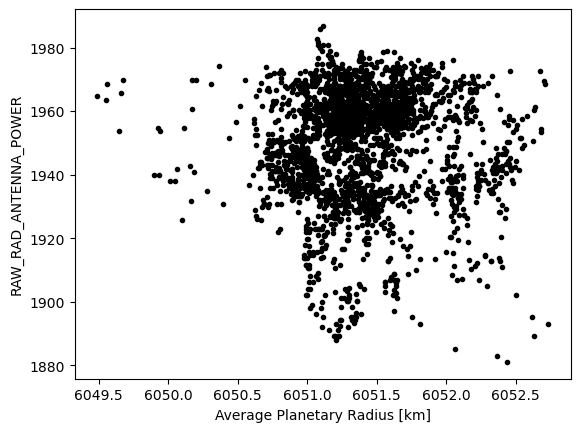

In [6]:
plt.plot(rdf["AVERAGE_PLANETARY_RADIUS"], rdf["RAW_RAD_ANTENNA_POWER"], 'k.')
plt.xlabel("Average Planetary Radius [km]")
plt.ylabel("RAW_RAD_ANTENNA_POWER")
plt.show()

### Plot ground track

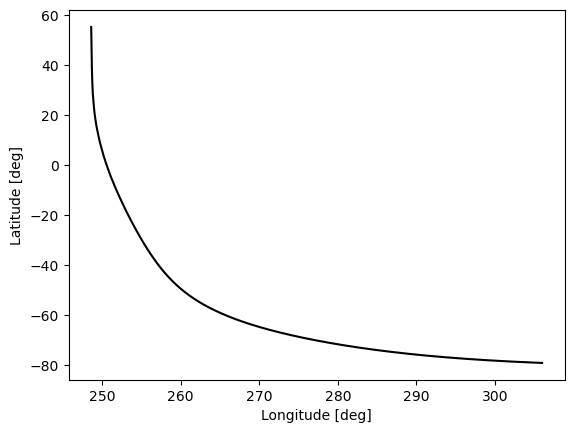

In [7]:
plt.plot(rdf["RAD_FOOTPRINT_LONGITUDE"], rdf["RAD_FOOTPRINT_LATITUDE"] , 'k')
plt.xlabel("Longitude [deg]")
plt.ylabel("Latitude [deg]")
plt.show()